## Atividades Propostas

**1) Carregue a rede da última tarefa.**

Gere um gráfico contendo três curvas:
a) a distribuição dos caminhos mínimos da rede (d no eixo das abscissas e p_d no das ordenadas);
b) a distribuição dos caminhos mínimos da rede aleatória via G(N,L);
c) a distribuição dos caminhos mínimos da rede a partir de aleatorização preservando os graus (degree preserving randomization).

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


In [2]:
# Rede real

g_real = nx.read_edgelist('ia-crime-moreno.edges')
N = g_real.number_of_nodes()
L = g_real.number_of_edges()

all_shortest_paths = dict(nx.all_pairs_shortest_path_length(g_real))
max_length = 0

for lengths in all_shortest_paths.values():
    max_length = max(max_length, max(lengths.values()))

sp_real = [0] * (max_length + 1)

for lengths in all_shortest_paths.values():
    for length in lengths.values():
        sp_real[length] += 1

# Exibir o resultado
for i in range(len(sp_real)):
    print(f'sp_real[{i}] = {sp_real[i]} caminhos mínimos de comprimento {i}')


print(f'Rede Real: \n N = {N}     L = {L}')

sp_real[0] = 829 caminhos mínimos de comprimento 0
sp_real[1] = 2946 caminhos mínimos de comprimento 1
sp_real[2] = 14196 caminhos mínimos de comprimento 2
sp_real[3] = 51474 caminhos mínimos de comprimento 3
sp_real[4] = 144654 caminhos mínimos de comprimento 4
sp_real[5] = 228626 caminhos mínimos de comprimento 5
sp_real[6] = 171830 caminhos mínimos de comprimento 6
sp_real[7] = 61232 caminhos mínimos de comprimento 7
sp_real[8] = 10670 caminhos mínimos de comprimento 8
sp_real[9] = 768 caminhos mínimos de comprimento 9
sp_real[10] = 16 caminhos mínimos de comprimento 10
Rede Real: 
 N = 829     L = 1475


In [3]:
# Rede aleatória

g_aleatoria = nx.gnm_random_graph(N, L)

all_shortest_paths = dict(nx.all_pairs_shortest_path_length(g_aleatoria))
max_length = 0

for lengths in all_shortest_paths.values():
    max_length = max(max_length, max(lengths.values()))

sp_aleatoria = [0] * (max_length + 1)

for lengths in all_shortest_paths.values():
    for length in lengths.values():
        sp_aleatoria[length] += 1

# Exibir o resultado
for i in range(len(sp_aleatoria)):
    print(f'sp_aleatoria[{i}] = {sp_aleatoria[i]} caminhos mínimos de comprimento {i}')




sp_aleatoria[0] = 829 caminhos mínimos de comprimento 0
sp_aleatoria[1] = 2950 caminhos mínimos de comprimento 1
sp_aleatoria[2] = 10148 caminhos mínimos de comprimento 2
sp_aleatoria[3] = 33216 caminhos mínimos de comprimento 3
sp_aleatoria[4] = 95014 caminhos mínimos de comprimento 4
sp_aleatoria[5] = 190594 caminhos mínimos de comprimento 5
sp_aleatoria[6] = 197222 caminhos mínimos de comprimento 6
sp_aleatoria[7] = 90212 caminhos mínimos de comprimento 7
sp_aleatoria[8] = 21034 caminhos mínimos de comprimento 8
sp_aleatoria[9] = 3284 caminhos mínimos de comprimento 9
sp_aleatoria[10] = 316 caminhos mínimos de comprimento 10
sp_aleatoria[11] = 18 caminhos mínimos de comprimento 11


In [4]:
# Rede Aleatorizada

# Obter a sequência de graus da rede real
degree_sequence = [d for n, d in g_real.degree()]

# Gerar uma rede aleatória com a mesma sequência de graus
g_aleatorizada = nx.random_degree_sequence_graph(degree_sequence, tries=10)

# Verificar se a rede aleatória foi gerada corretamente
if nx.is_graphical(degree_sequence):
    print("Rede aleatória gerada com sucesso!")
else:
    print("Erro ao gerar a rede aleatória.")


Rede aleatória gerada com sucesso!


In [5]:
all_shortest_paths = dict(nx.all_pairs_shortest_path_length(g_aleatorizada))
max_length = 0

for lengths in all_shortest_paths.values():
    max_length = max(max_length, max(lengths.values()))

sp_aleatorizada = [0] * (max_length + 1)

for lengths in all_shortest_paths.values():
    for length in lengths.values():
        sp_aleatorizada[length] += 1

# Exibir o resultado
for i in range(len(sp_aleatorizada)):
    print(f'sp_aleatorizada[{i}] = {sp_aleatorizada[i]} caminhos mínimos de comprimento {i}')



sp_aleatorizada[0] = 829 caminhos mínimos de comprimento 0
sp_aleatorizada[1] = 2950 caminhos mínimos de comprimento 1
sp_aleatorizada[2] = 14716 caminhos mínimos de comprimento 2
sp_aleatorizada[3] = 60596 caminhos mínimos de comprimento 3
sp_aleatorizada[4] = 163516 caminhos mínimos de comprimento 4
sp_aleatorizada[5] = 214392 caminhos mínimos de comprimento 5
sp_aleatorizada[6] = 131010 caminhos mínimos de comprimento 6
sp_aleatorizada[7] = 44308 caminhos mínimos de comprimento 7
sp_aleatorizada[8] = 9556 caminhos mínimos de comprimento 8
sp_aleatorizada[9] = 1302 caminhos mínimos de comprimento 9
sp_aleatorizada[10] = 96 caminhos mínimos de comprimento 10
sp_aleatorizada[11] = 2 caminhos mínimos de comprimento 11


In [6]:
# Encontrar o comprimento máximo entre os vetores
max_length = max(len(sp_real), len(sp_aleatoria), len(sp_aleatorizada))

# Ajustar o comprimento dos vetores preenchendo com zeros onde necessário
def pad_vector(vector, length):
    padded_vector = np.zeros(length)
    padded_vector[:len(vector)] = vector
    return padded_vector

sp_real_padded = pad_vector(sp_real, max_length)
sp_aleatoria_padded = pad_vector(sp_aleatoria, max_length)
sp_aleatorizada_padded = pad_vector(sp_aleatorizada, max_length)

# Normalizar os vetores ajustados
sp_real_norm = sp_real_padded / np.sum(sp_real_padded)
sp_aleatoria_norm = sp_aleatoria_padded / np.sum(sp_aleatoria_padded)
sp_aleatorizada_norm = sp_aleatorizada_padded / np.sum(sp_aleatorizada_padded)


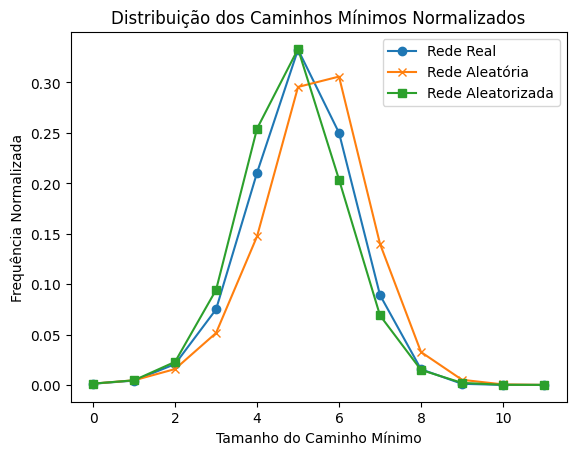

In [7]:

# Definir o eixo x, que corresponde aos diferentes comprimentos de caminhos mínimos
x_values = np.arange(max_length)

# Plotar as curvas
plt.plot(x_values, sp_real_norm, label='Rede Real', marker='o')
plt.plot(x_values, sp_aleatoria_norm, label='Rede Aleatória', marker='x')
plt.plot(x_values, sp_aleatorizada_norm, label='Rede Aleatorizada', marker='s')

# Adicionar título e rótulos
plt.title('Distribuição dos Caminhos Mínimos Normalizados')
plt.xlabel('Tamanho do Caminho Mínimo')
plt.ylabel('Frequência Normalizada')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()



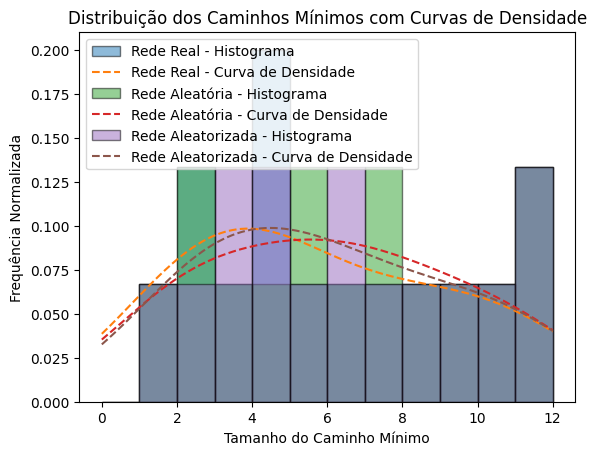

In [8]:
# Vetores de distribuição (substitua pelos seus vetores reais)
sp_real = np.array([1, 2, 2, 3, 4, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12])
sp_aleatoria = np.array([1, 2, 2, 3, 4, 5, 5, 6, 7, 7, 8, 9, 10, 11, 12])
sp_aleatorizada = np.array([1, 2, 3, 3, 4, 4, 5, 6, 6, 7, 8, 9, 10, 11, 12])

# Encontrar o maior valor entre os vetores
max_value = max(np.max(sp_real), np.max(sp_aleatoria), np.max(sp_aleatorizada))

# Definir o número de bins
num_bins = 12  # Ajuste para refletir o número real de bins desejado

# Criar os bins usando np.linspace, limitado ao maior valor de caminho
bins = np.linspace(0, max_value, num_bins + 1)

# Criar a função para calcular e plotar histograma e curva de densidade
def plot_histogram_with_density(data, bins, label):
    # Plotar histograma
    plt.hist(data, bins=bins, density=True, alpha=0.5, label=f'{label} - Histograma', edgecolor='black')
    
    # Calcular e plotar a curva de densidade
    kde = gaussian_kde(data, bw_method='scott')
    x = np.linspace(0, max_value, 1000)
    plt.plot(x, kde(x), label=f'{label} - Curva de Densidade', linestyle='--')

# Criar o gráfico
plot_histogram_with_density(sp_real, bins, 'Rede Real')
plot_histogram_with_density(sp_aleatoria, bins, 'Rede Aleatória')
plot_histogram_with_density(sp_aleatorizada, bins, 'Rede Aleatorizada')

# Adicionar título e rótulos
plt.title('Distribuição dos Caminhos Mínimos com Curvas de Densidade')
plt.xlabel('Tamanho do Caminho Mínimo')
plt.ylabel('Frequência Normalizada')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()


**2) Mostre quais são os d_médio para cada curva, juntamente com o seu desvio padrão, como na legenda da Image 4.19 do livro.**


In [9]:
# Função para calcular média e desvio padrão
def calculate_mean_std(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return mean, std_dev

# Calcular média e desvio padrão para cada vetor
mean_real, std_real = calculate_mean_std(sp_real)
mean_aleatoria, std_aleatoria = calculate_mean_std(sp_aleatoria)
mean_aleatorizada, std_aleatorizada = calculate_mean_std(sp_aleatorizada)

# Criar e imprimir a tabela
print(f"{'Rede':<20}{'d_médio':<15}{'Desvio Padrão':<15}")
print(f"{'Real':<20}{mean_real:<15.2f}{std_real:<15.2f}")
print(f"{'Aleatória':<20}{mean_aleatoria:<15.2f}{std_aleatoria:<15.2f}")
print(f"{'Aleatorizada':<20}{mean_aleatorizada:<15.2f}{std_aleatorizada:<15.2f}")

Rede                d_médio        Desvio Padrão  
Real                5.87           3.36           
Aleatória           6.13           3.30           
Aleatorizada        6.07           3.26           


**3) O que se pode inferir sobre essa rede ao olhar as distribuições de graus (calculada na última tarefa) e caminhos mínimos? Como a rede se compara com suas versões aleatórias?**

As redes tiveram resultados similares. Possivelmente pela formulação da rede real. Porém é possível notar que a rede aleatorizada apesar de ter caminho mínimo médio maior que a rede real, assim como a aletória, apresenta resultados mais próximo da rede real em comparação com a rede aleatória.